In [19]:
import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.covariance import empirical_covariance
from pandas import DataFrame

In [20]:
def read(file):
    return pd.read_csv(file)

#features.set_index(['Index'], inplace = True)
#features.drop(columns = ['Index'], inplace = True)

features = read('csv_project_dataset.csv')
features.head(5)
def print_shape(data):
    print("The shape of our feature is " + str(data.shape))

print_shape(features)
#summary statistics
features.describe()
features.columns.values
#pd.options.display.max_rows = 181
pd.options.display.max_columns = 30
#features.sort_values(by = "L [mm]", ascending = True, inplace = True)
#display(features)
#one hot encoding
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181
#features = pd.get_dummies(features, columns = ['n [count]', 'Material'])
#features = pd.get_dummies(features, columns = ['n [count]'])
#features = pd.get_dummies(features, columns = ['Material'])
#features.head(5)
#display(features)
#print_shape(features)

The shape of our feature is (177, 19)


In [21]:
#target pmax
pmax = features['Pmax [N]']
#Remove labels from the features
features = features.drop('Pmax [N]', axis = 1)

features = StandardScaler().fit_transform(features)

#pca = PCA(n_components = 11)
#principalComponents = pca.fit_transform(features)
#features = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
#display(features)
#print(pca.explained_variance_ratio_.cumsum())

#Covert to numpy arrays
#features = np.array(features)



#print(features)
print_shape(pmax)
print_shape(features)

The shape of our feature is (177,)
The shape of our feature is (177, 18)


In [22]:
#split the data into training set and testing set 
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [23]:
cov_matrix = empirical_covariance(train_features)

In [24]:
pca = PCA(0.95)
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

In [25]:


rf = RandomForestRegressor(n_estimators = 570, random_state = 141)
rf.fit(train_features, train_labels)
#Make Predictions
#Use the forest's predict method on the test data 
predictions = rf.predict(test_features)
print(predictions)
#Calculate the absolute errors
errors = abs(predictions - test_labels)

#print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'newton.')
# Calculate mean absolute percentage error
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

[16.2890037  12.10507402  9.12359521 45.20336564 10.56351603 25.11742521
  9.22328289 49.26247185  9.31932499 18.30644393 38.37999244 23.73339046
 21.85317698  6.68351951 15.38028712 18.08290127 11.70208378 30.032197
 11.53901575 26.25502255 38.58014992 17.68559481 29.38449769 43.53687234
 46.40513717 13.59666157 45.12502238 17.18451804 70.03549044 17.47761441
 27.43103856 11.67217215 19.30821585  7.34582331 32.91362369 17.2548019
 49.21638906  8.17826634  7.38269467 23.0440133  37.98273055 10.53562343
 54.88199277 13.09337226 24.33803385]
Mean Absolute Error: 3.62 newton.
Accuracy: 82.19 %.


In [26]:
new = DataFrame(predictions, test_labels)
new.to_csv("line_to_scatter_converter.csv")

In [27]:
mid = pd.read_csv("line_to_scatter_converter.csv")
mid.sort_values(by = "truth", inplace = True)
mid.to_csv("lts_sort.csv", index = False)

In [28]:
final = pd.read_csv("lts_sort.csv")
index = final.index
pmax_pred = final["predict"]
label = final["truth"]

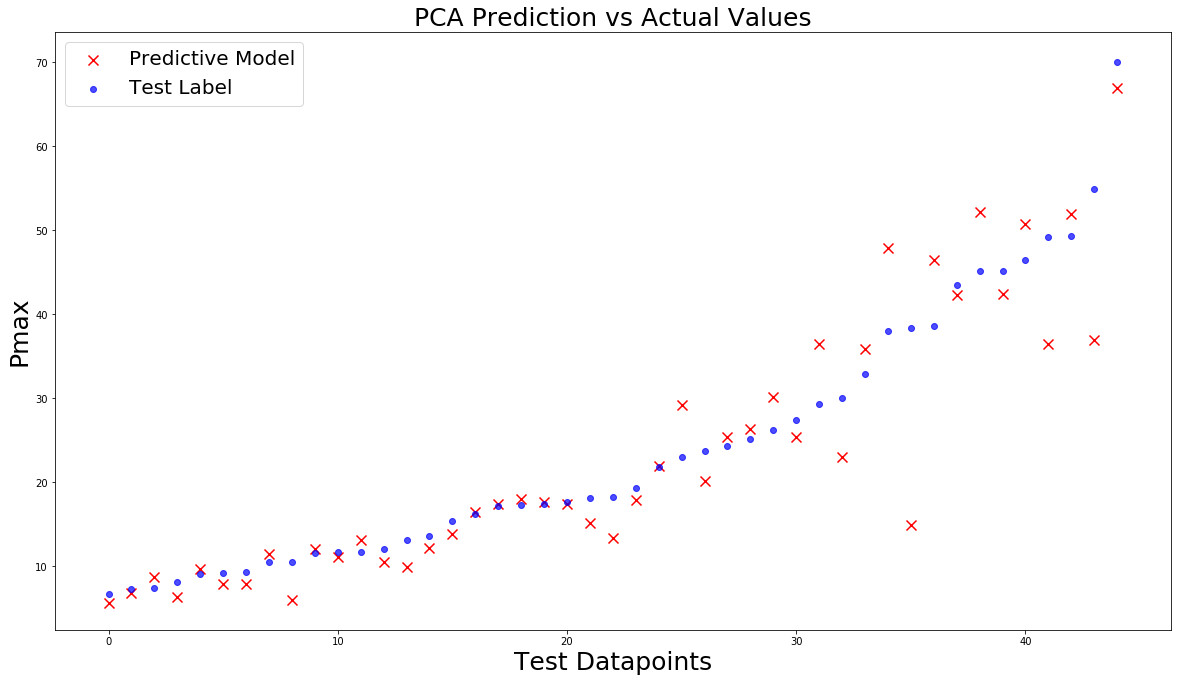

In [31]:
fig = plt.figure(figsize=(20,11))
plt.xlabel("Test Datapoints", fontsize = 25)
plt.ylabel("Pmax", fontsize = 25)
plt.title("PCA Prediction vs Actual Values", fontsize = 25)

plt.scatter(index, pmax_pred, color = "r", label = "Predictive Model", marker = "x", s = 100)
plt.scatter(index, label, color = "b", alpha = 0.7, label = "Test Label")

plt.legend(loc = 2, prop = {"size" : 20})



plt.savefig("PCA_plot.png")